<a href="https://colab.research.google.com/github/rahulk98/Deep_learning_algorithms/blob/master/autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 64  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.


In [0]:
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

In [0]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')


In [0]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

In [5]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print (x_train.shape)
print (x_test.shape)

(60000, 784)
(10000, 784)


In [6]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 5s 82us/step - loss: 0.3444 - val_loss: 0.2670
Epoch 2/50
60000/60000 [==============================] - 5s 78us/step - loss: 0.2561 - val_loss: 0.2414
Epoch 3/50
60000/60000 [==============================] - 5s 78us/step - loss: 0.2298 - val_loss: 0.2165
Epoch 4/50
60000/60000 [==============================] - 5s 79us/step - loss: 0.2093 - val_loss: 0.2000
Epoch 5/50
60000/60000 [==============================] - 5s 77us/step - loss: 0.1953 - val_loss: 0.1881
Epoch 6/50
60000/60000 [==============================] - 5s 77us/step - loss: 0.1849 - val_loss: 0.1790
Epoch 7/50
60000/60000 [==============================] - 5s 78us/step - loss: 0.1765 - val_loss: 0.1713
Epoch 8/50
60000/60000 [==============================] - 5s 77us/step - loss: 0.1694 - val_loss: 0.1648
Epoch 9/50
60000/60000 [==============================] - 5s 7

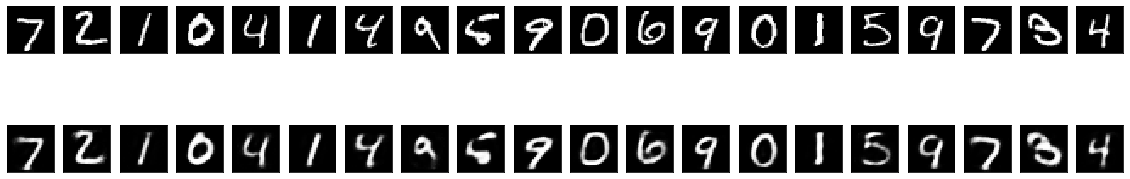

In [7]:
# use Matplotlib (don't ask)
import matplotlib.pyplot as plt
decoded_imgs = autoencoder.predict(x_test)
n = 20  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [15]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K
#Image denoising using autoencoder
#Adding Guassian noise to mnist data

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

#Creating an CNN encoder and decoder
input_img = Input(shape=(28, 28, 1))  # adapt this if using `channels_first` image data format

x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (7, 7, 32)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

autoencoder.fit(x_train_noisy, x_train,
                epochs=3,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))





Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 167s 3ms/step - loss: 0.2018 - val_loss: 0.1453
Epoch 2/3
60000/60000 [==============================] - 167s 3ms/step - loss: 0.1558 - val_loss: 0.1268
Epoch 3/3
60000/60000 [==============================] - 166s 3ms/step - loss: 0.1312 - val_loss: 0.1261


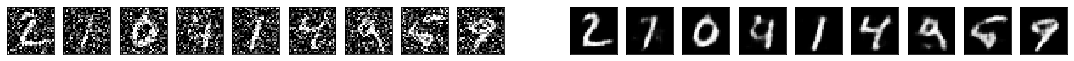

In [16]:
decoded_imgs = autoencoder.predict(x_test_noisy)

n = 10
plt.figure(figsize=(20, 2))
for i in range(1, n):
  ax = plt.subplot(1, n+10, i)
  plt.imshow(x_test_noisy[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

    # display reconstruction
  ax = plt.subplot(1, n+10, i + n)
  plt.imshow(decoded_imgs[i].reshape(28, 28))   
  plt.gray()
  ax.get_xaxis().set_visible(False)  
  ax.get_yaxis().set_visible(False)
plt.show()